# Импорт библиотек и создание копии данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

old_data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
data = old_data.copy()

In [2]:
"""Визуальное ознакомление с данными и их типом"""
data.head(10)
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Вывод

### Шаг 2. Предобработка данных

In [3]:
""" Разберемся с потолками. Решение - заменить пропуски общим медианным значением и убрать 
выбросы - выше 5 и ниже 2 метров"""
data.isnull().sum() #9195 пропусков в потолках, сначала поправим их
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data = data[(data["ceiling_height"] >= 2) & (data["ceiling_height"] <= 5)]
data["ceiling_height"].describe()

count    23660.000000
mean         2.696121
std          0.215680
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          5.000000
Name: ceiling_height, dtype: float64

In [4]:
""" Разбор ситуации с этажами. По нашим данным особо не понять, этажность дома, пропусков совсем
немного, поэтому проще выкинуть их из выборки. """

data['floors_total'].isna().sum() # 80 с небольшим, для выборки некритично, можем удалить
data.dropna(subset = ['floors_total'], inplace = True)
data['floors_total'].isna().sum()

0

In [5]:
data.info()
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23574 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23574 non-null int64
last_price              23574 non-null float64
total_area              23574 non-null float64
first_day_exposition    23574 non-null object
rooms                   23574 non-null int64
ceiling_height          23574 non-null float64
floors_total            23574 non-null float64
living_area             21706 non-null float64
floor                   23574 non-null int64
is_apartment            2762 non-null object
studio                  23574 non-null bool
open_plan               23574 non-null bool
kitchen_area            21352 non-null float64
balcony                 12108 non-null float64
locality_name           23526 non-null object
airports_nearest        18053 non-null float64
cityCenters_nearest     18076 non-null float64
parks_around3000        18077 non-null float64
parks_nearest           8029 non-null float64
ponds_around300

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1868
floor                       0
is_apartment            20812
studio                      0
open_plan                   0
kitchen_area             2222
balcony                 11466
locality_name              48
airports_nearest         5521
cityCenters_nearest      5498
parks_around3000         5497
parks_nearest           15545
ponds_around3000         5497
ponds_nearest           14530
days_exposition          3164
dtype: int64

In [6]:
"""Пропуски в апартаментах скорее всего связаны с человеческим фактором, пропуск вместо нет"""


data['is_apartment'].isnull().sum()#20812
data['is_apartment'].unique()
data[data['is_apartment']==True]
data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'].isnull().sum()
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23574 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23574 non-null int64
last_price              23574 non-null float64
total_area              23574 non-null float64
first_day_exposition    23574 non-null object
rooms                   23574 non-null int64
ceiling_height          23574 non-null float64
floors_total            23574 non-null float64
living_area             21706 non-null float64
floor                   23574 non-null int64
is_apartment            23574 non-null bool
studio                  23574 non-null bool
open_plan               23574 non-null bool
kitchen_area            21352 non-null float64
balcony                 12108 non-null float64
locality_name           23526 non-null object
airports_nearest        18053 non-null float64
cityCenters_nearest     18076 non-null float64
parks_around3000        18077 non-null float64
parks_nearest           8029 non-null float64
ponds_around3000

In [7]:
data['balcony'].isna().sum()#11466 скорее всего без балкона
data['balcony'] = data['balcony'].fillna(0)
data['balcony'].isna().sum()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23574 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23574 non-null int64
last_price              23574 non-null float64
total_area              23574 non-null float64
first_day_exposition    23574 non-null object
rooms                   23574 non-null int64
ceiling_height          23574 non-null float64
floors_total            23574 non-null float64
living_area             21706 non-null float64
floor                   23574 non-null int64
is_apartment            23574 non-null bool
studio                  23574 non-null bool
open_plan               23574 non-null bool
kitchen_area            21352 non-null float64
balcony                 23574 non-null float64
locality_name           23526 non-null object
airports_nearest        18053 non-null float64
cityCenters_nearest     18076 non-null float64
parks_around3000        18077 non-null float64
parks_nearest           8029 non-null float64
ponds_around3000

In [8]:
data.duplicated().sum() #проверка на дубликаты


0

In [9]:
"""Изменение типов данных: first_day_exposition - дата. Уберем часы для более удобного чтения """
data.head(20)
data['first_day_exposition'] =pd.to_datetime(data['first_day_exposition'], format = "%Y.%m.%d")
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,...,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.60,1,False,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.30,4,False,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,NaN,9,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,...,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.40,5,False,...,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02,1,2.65,26.0,10.60,6,False,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18,2,2.65,24.0,NaN,22,False,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23,1,2.65,27.0,15.43,26,False,...,8.81,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


### Вывод

Нужно было разобраться с пропусками по потолкам, этажам, балконами - это довольно легко, в даннных в основном ошибки при заполнении, люди часто вместо отрицательного символа оставляют прочерк. Так же данные проверили на дубликаты - их нет, и поменяли тип данных в дате размещения на date, чтобы в будущем использовать специальные методы. 

In [10]:
kitchen_index = (data['kitchen_area']/data['total_area']).mean()
kitchen_index
data['kitchen_area'] = data['kitchen_area'].fillna(kitchen_index)
data.isnull().sum()


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1868
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              48
airports_nearest         5521
cityCenters_nearest      5498
parks_around3000         5497
parks_nearest           15545
ponds_around3000         5497
ponds_nearest           14530
days_exposition          3164
dtype: int64

### Шаг 3. Посчитайте и добавьте в таблицу

In [11]:
""" Добавим новые столбцы в таблицу: цена квадратного метра, день недели,
месяц, год объявления, группа этажа, соотношение жилой площади, 
соотношения кухни и жилой площади к общей площади  """
data['sq_price'] = data['last_price']/data['total_area'] #столбец с ценой квадратного метра 
data.head()



,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_price
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,False,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000


In [12]:
""" Группировка этажей: первый, последний и другой """

def fl_group (row):
    if row['floor'] == 1:
        return "Первый"
    if row['floor'] == row['floors_total']:
        return "Последний"
    else: 
        return "Другой"
data['floor_group'] = data.apply(fl_group, axis = 1)
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_price,floor_group
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,Другой
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.60,1,False,...,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,Первый
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.30,4,False,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,Другой
3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,NaN,9,False,...,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,Другой
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,Другой
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.40,5,False,...,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.789474,Другой
6,6,3700000.0,37.30,2017-11-02,1,2.65,26.0,10.60,6,False,...,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,99195.710456,Другой
7,5,7915000.0,71.60,2019-04-18,2,2.65,24.0,NaN,22,False,...,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,110544.692737,Другой
8,20,2900000.0,33.16,2018-05-23,1,2.65,27.0,15.43,26,False,...,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,87454.764777,Другой
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,...,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,88524.590164,Другой


In [13]:
"""Столбцы с днем недели, годом, месяцем публицации объявления"""
data['weekday'] = data['first_day_exposition'].dt.dayofweek #добавляет столбец с днем недели, 0 -понедельник
data['year'] = data['first_day_exposition'].dt.year
data['month'] = data['first_day_exposition'].dt.month
data.head(10)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23574 entries, 0 to 23698
Data columns (total 27 columns):
total_images            23574 non-null int64
last_price              23574 non-null float64
total_area              23574 non-null float64
first_day_exposition    23574 non-null datetime64[ns]
rooms                   23574 non-null int64
ceiling_height          23574 non-null float64
floors_total            23574 non-null float64
living_area             21706 non-null float64
floor                   23574 non-null int64
is_apartment            23574 non-null bool
studio                  23574 non-null bool
open_plan               23574 non-null bool
kitchen_area            23574 non-null float64
balcony                 23574 non-null float64
locality_name           23526 non-null object
airports_nearest        18053 non-null float64
cityCenters_nearest     18076 non-null float64
parks_around3000        18077 non-null float64
parks_nearest           8029 non-null float64
ponds_ar

In [14]:
"""Соотношение жилой площади и кухни к общей"""
data["living_to_total"] = data['living_area']/data['total_area']
data['kitchen_to_total'] = data['kitchen_area']/data['total_area']
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,sq_price,floor_group,weekday,year,month,living_to_total,kitchen_to_total
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,...,2.0,755.0,NaN,120370.370370,Другой,3,2019,3,0.472222,0.231481
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.60,1,False,...,0.0,NaN,81.0,82920.792079,Первый,1,2018,12,0.460396,0.272277
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.30,4,False,...,2.0,574.0,558.0,92785.714286,Другой,3,2015,8,0.612500,0.148214
3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,NaN,9,False,...,3.0,234.0,424.0,408176.100629,Другой,4,2015,7,NaN,0.001178
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,...,1.0,48.0,121.0,100000.000000,Другой,1,2018,6,0.320000,0.410000
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.40,5,False,...,NaN,NaN,55.0,95065.789474,Другой,0,2018,9,0.473684,0.299342
6,6,3700000.0,37.30,2017-11-02,1,2.65,26.0,10.60,6,False,...,0.0,NaN,155.0,99195.710456,Другой,3,2017,11,0.284182,0.386059
7,5,7915000.0,71.60,2019-04-18,2,2.65,24.0,NaN,22,False,...,0.0,NaN,NaN,110544.692737,Другой,3,2019,4,NaN,0.263966
8,20,2900000.0,33.16,2018-05-23,1,2.65,27.0,15.43,26,False,...,NaN,NaN,189.0,87454.764777,Другой,2,2018,5,0.465320,0.265682
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,...,0.0,NaN,289.0,88524.590164,Другой,6,2017,2,0.714754,0.106557


### Чистка выбросов. 

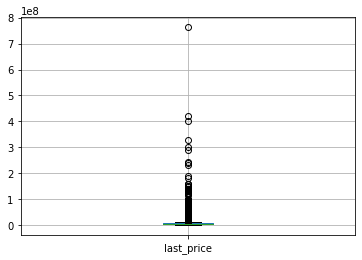

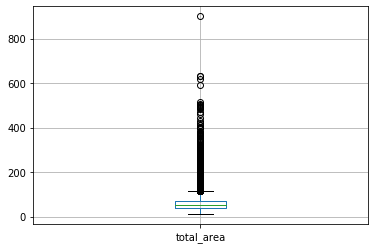

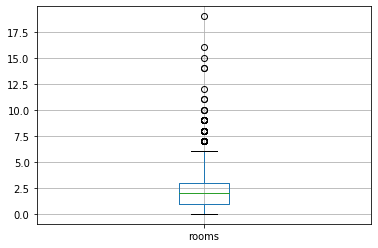

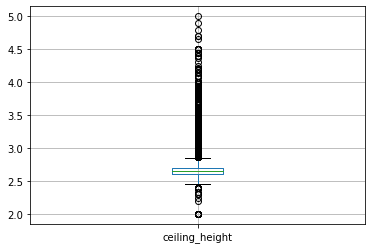

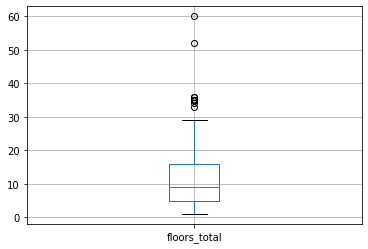

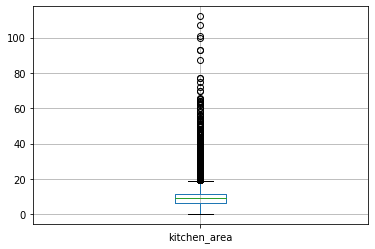

In [15]:
#data = data[data["last_price"] <= 25000000]#уберем выбросы в столбце с ценой
def box_plots (x):
    columns = ['last_price','total_area', 'rooms', 'ceiling_height', 'floors_total',
           'kitchen_area']
    for i in columns:
        x.boxplot(column=i)
        plt.show()
box_plots(data)

Выше я выделил числовые показатели из данных, которые могут быть интересны при исследовании. 
Исходя из графиков можно считать выбросами: 
last_price - 25 000 000 
total_area - 400
floors_total - 40
kitchen_area - 80
Установим фильтр для всех этих значений: 

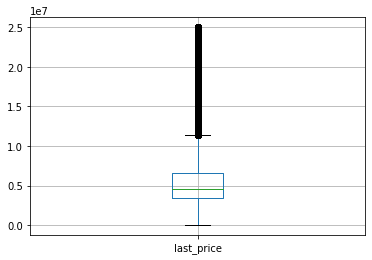

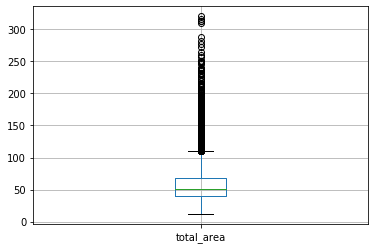

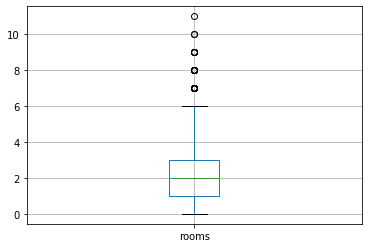

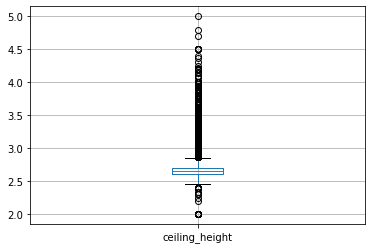

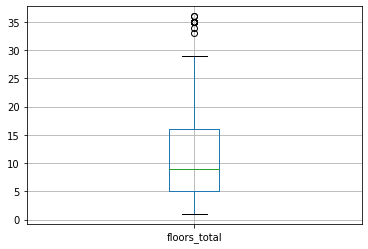

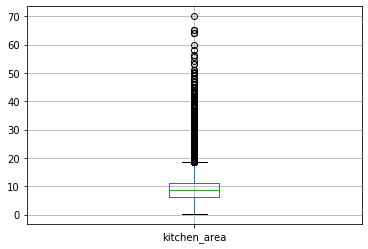

In [16]:
data = data[
    (data["last_price"] <= 25000000) &
    (data["total_area"] <= 400) &
    (data["floors_total"] <= 40) &
    (data["kitchen_area"] <= 80) &
    (data["rooms"] <= 13)
]#уберем выбросы в столбцах
data.describe()
box_plots(data)

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

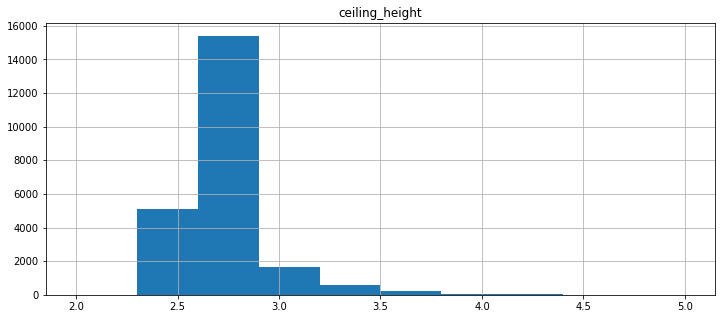

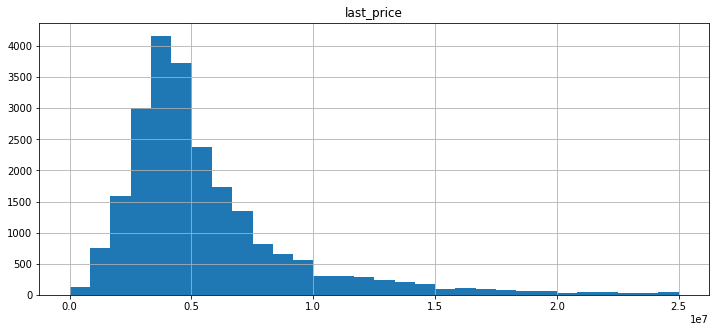

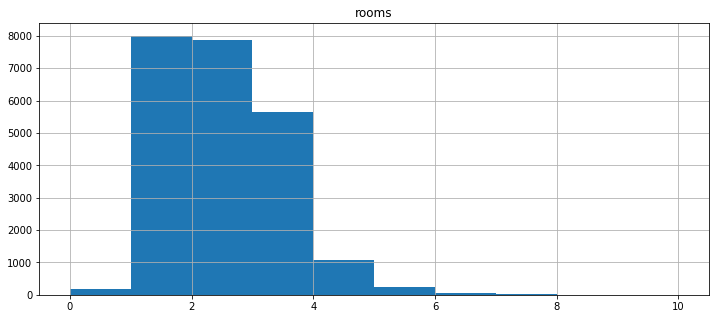

In [17]:
"""Гистограммы площади, цены, числа комнат, высоты потолков"""
data.hist('ceiling_height', bins = 10, range = (2,5), figsize = (12,5))
plt.show()
data.hist('last_price', bins = 30, figsize = (12,5))
plt.show()
data.hist('rooms', bins = 10, range = (0,10), figsize = (12,5))
plt.show()

count    20068.000000
mean       178.810993
std        217.446512
min          1.000000
25%         45.000000
50%         94.000000
75%        228.000000
max       1580.000000
Name: days_exposition, dtype: float64


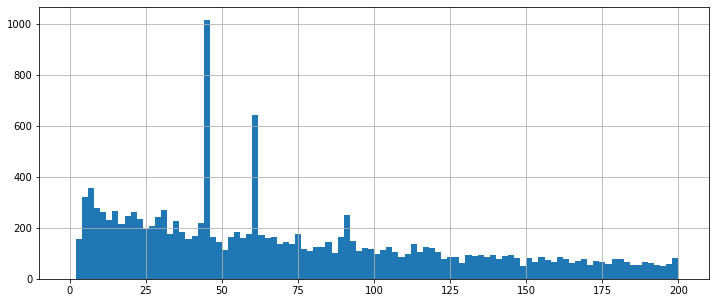

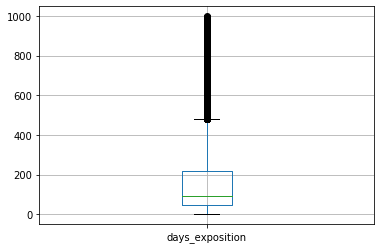

In [18]:
print(data['days_exposition'].describe())
len(data[data['days_exposition']>500]) # долгие сделки
len(data[data['days_exposition']>1000]) #скорее всего выбросы или очень специфичные квартиры, для расчетов не нужны
data = data[data["days_exposition"] < 1000]
data['days_exposition'].hist(bins = 100, range = (0,200), figsize = (12,5))
plt.show()
data.boxplot(column = 'days_exposition')
plt.show()


In [19]:
data['days_exposition'].value_counts()

45.0     878
60.0     538
7.0      232
30.0     204
90.0     184
        ... 
880.0      1
851.0      1
890.0      1
839.0      1
773.0      1
Name: days_exposition, Length: 936, dtype: int64

### Скороть продажи квартир
В основном квартиры продают очень быстро - до трех месяцев, это логично, так как типичная квартира (однушка или двушка) - самый ликвидный товар, большие квартиры продаются гораздо дольше. 

In [20]:
"""корреляционная матрица"""
data_cor = data[
    ['last_price',
     'sq_price',
     'rooms',
     'cityCenters_nearest',
     'floor_group']
]
data_cor.corr().T



,last_price,sq_price,rooms,cityCenters_nearest
last_price,1.000000,0.637438,0.515072,-0.352047
sq_price,0.637438,1.000000,-0.110508,-0.389728
rooms,0.515072,-0.110508,1.000000,-0.152923
cityCenters_nearest,-0.352047,-0.389728,-0.152923,1.000000


### Взаимосвязи переменных
Видно, что на финальную цену влияет сильно цена за квадратный метр (что логично), наличие комнтат - в абсолютном выражении чем больше квартира, тем она дороже, и удаленность от центра города - квартиры ближе к центру - дороже. 

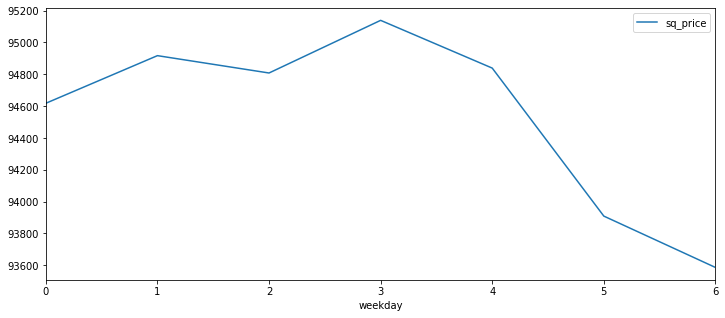

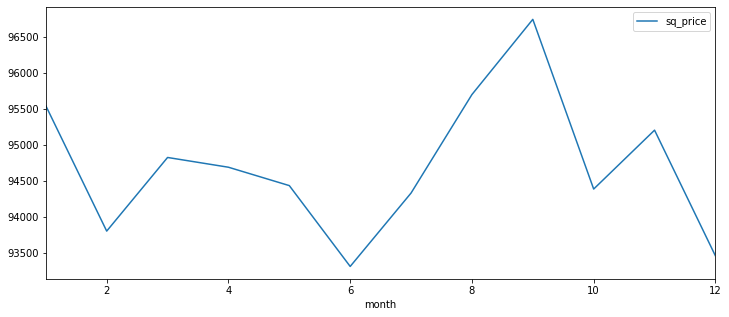

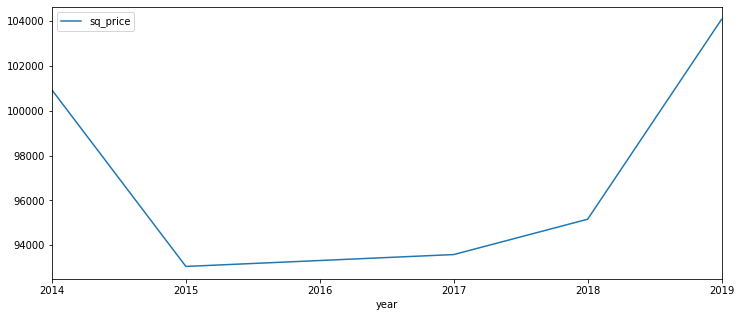

In [21]:
for i in ['weekday', 'month', 'year']:
    date_data = data.pivot_table(
    index = i, 
    values = 'sq_price')
    date_data.plot( figsize = (12,5))
    plt.show()

Если разбить по времени стоимость квадратного метра, видно, что рынок ощутимо проседал после 2014 года
и резко рос после  2018. При этом в течение года пик приходится на осень, в то время как летом, из-за спада 
на рынке, люди отдают квартиры с небольшим дисконтом. По дням недели я бы не делал вывод, что есть 
зависимость, в процентном соотношении цены слабо меняются, скорее это зависит от сделок. 

В целом видно, что квартиры не зависят от даты, исключением может быть конец 14-го года, который объявляется валютным кризисом и ажиотажомным спросом на рынке недвижимости, часто люди отдавали за беценок и продавали за очень дорого, как бы это парадоксально не было. А я доллары по 32 купил. Ну и времечко было, конечно. Никогда такого не было, и вот опять. 

In [22]:
data.pivot_table(
    index = 'floor_group', 
    values = 'sq_price', 
    aggfunc = 'mean').sort_values('sq_price')

,sq_price
floor_group,
Первый,79432.885908
Последний,87032.080975
Другой,98626.720771


Люди ценят больше квартиры между первым и последним, первый вообще ощутимо дешевле среднего, на последнем люди селятся охотнее. 

In [23]:
city_data = data.pivot_table(index = 'locality_name', values = 'sq_price', aggfunc = ['count', 'mean'])
city_data.columns = ['count', 'mean_sq']
price_towns =  city_data.sort_values('count', ascending = False).head(10)
price_towns.sort_values('mean_sq', ascending = False)

,count,mean_sq
locality_name,,
Санкт-Петербург,13032,107873.112118
Пушкин,295,101213.300844
деревня Кудрово,294,92421.528671
посёлок Парголово,301,89423.993853
посёлок Мурино,508,85828.885878
посёлок Шушары,403,77798.015279
Колпино,305,74700.747117
Всеволожск,335,68623.139486
Гатчина,267,67938.480307


Больше всего объявлений в Петербурге (логично, Питер значительно больше всех городов из выборки по населению), а меньше всего в Выборге. Дороже всего жилье в самом Питере и ближайшем пригороде, самый дешевый город - снова Выборг. А зря, в Выборге красиво. 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


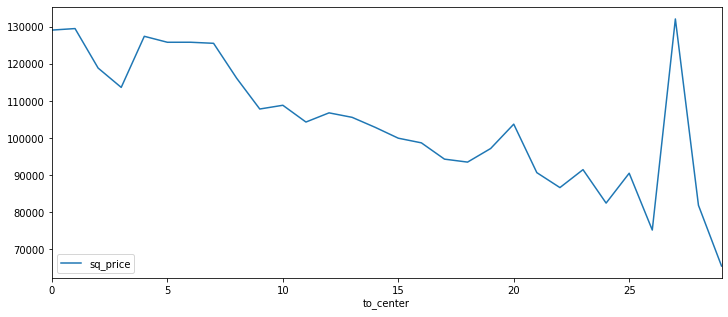

In [24]:
spb_flats = data[data['locality_name']=='Санкт-Петербург']
spb_flats #13036 объявлений из СПБ 
spb_flats['cityCenters_nearest']
spb_flats['to_center'] = spb_flats['cityCenters_nearest']//1000
spb_flats['to_center']
spb_show = spb_flats.pivot_table(index='to_center', values = 'sq_price', aggfunc = 'mean')
spb_show
spb_show.plot( figsize = (12,5))
plt.show()

In [25]:
spb_center = spb_flats[spb_flats['to_center']<7]
spb_center.head(10)
spb_center.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,ponds_around3000,ponds_nearest,days_exposition,sq_price,weekday,year,month,living_to_total,kitchen_to_total,to_center
count,2407.000000,2.407000e+03,2407.000000,2407.000000,2407.000000,2407.000000,2212.000000,2407.000000,2407.000000,2407.000000,...,2407.000000,1739.000000,2407.000000,2407.000000,2407.000000,2407.000000,2407.000000,2212.000000,2407.000000,2407.000000
mean,9.641047,9.460336e+06,79.255854,2.633569,2.909119,6.838803,46.971171,3.968841,11.780618,0.294973,...,1.288741,478.082806,217.877856,124005.838739,2.517241,2017.075613,6.636892,0.581367,0.161296,3.852098
std,5.808164,4.562447e+06,36.942313,1.264452,0.337206,3.679008,26.547274,2.724436,7.374159,0.734657,...,1.091097,275.827590,224.052463,39638.482557,1.710929,0.987923,3.435587,0.115634,0.094377,1.521165
min,0.000000,1.600000e+06,12.000000,0.000000,2.400000,2.000000,2.000000,1.000000,0.187340,0.000000,...,0.000000,22.000000,3.000000,15345.268542,0.000000,2014.000000,1.000000,0.038462,0.000592,0.000000
25%,5.000000,6.250000e+06,52.650000,2.000000,2.650000,5.000000,29.000000,2.000000,8.000000,0.000000,...,0.000000,239.000000,60.000000,96369.195387,1.000000,2017.000000,3.000000,0.512807,0.109333,3.000000
50%,9.000000,8.300000e+06,72.000000,2.000000,2.750000,5.000000,42.000000,3.000000,10.800000,0.000000,...,1.000000,471.000000,127.000000,116054.158607,3.000000,2017.000000,7.000000,0.596090,0.148760,4.000000
75%,14.000000,1.170000e+07,96.620000,3.000000,3.100000,8.000000,58.625000,5.000000,15.000000,0.000000,...,2.000000,692.500000,313.500000,143043.020809,4.000000,2018.000000,10.000000,0.663717,0.202464,5.000000
max,50.000000,2.500000e+07,316.300000,10.000000,4.800000,25.000000,211.000000,23.000000,56.200000,5.000000,...,3.000000,1293.000000,999.000000,392354.124748,6.000000,2019.000000,12.000000,0.983447,0.625000,6.000000


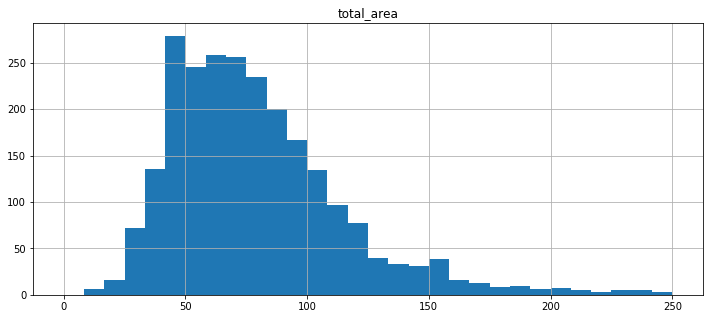

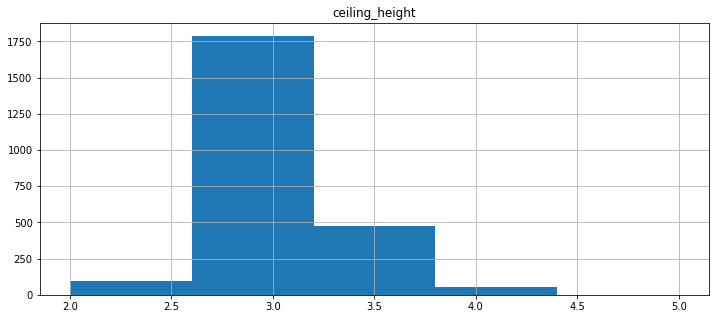

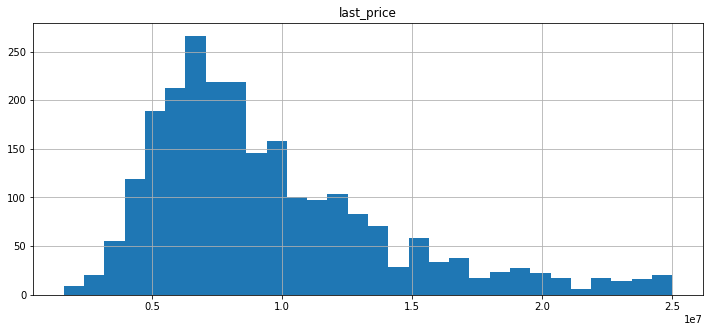

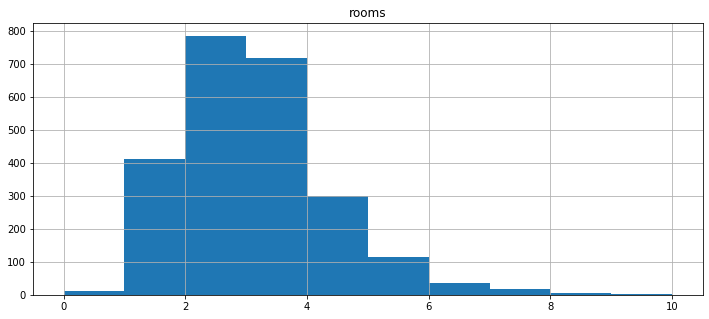

In [26]:
"""площадь, цена, число комнат, высота потолков"""
spb_center.hist('total_area', bins = 30, range = (0,250), figsize = (12,5))
plt.show()
spb_center.hist('ceiling_height', bins = 5, range = (2,5), figsize = (12,5))
plt.show()
spb_center.hist('last_price', bins = 30, figsize = (12,5))
plt.show()
spb_center.hist('rooms', bins = 10, range = (0,10), figsize = (12,5))
plt.show()

Распределение велечин числа комнат, цены и высоты потолков в Петербурге имеют вид нормального распределения, так же, как и в большой выборке.  что не противоречит логике, так как все события (или каждая квартира) происходят независимо друг от друга.  
Так по гистограммам видно, что большая часть квартир имеет потолки от 2,6 до 3 с небольшим метра высотой (привет старому жилому фонду), площадь большей части квартир варьриуется от 40 до 80 квадратных метров, чаще всего это двушки или трешки, чаще цены на такие кваритры от 5 до 6 миллионов. 

In [27]:
"""число комнат, этаж, удалённость от центра, дата размещения объявления"""
spb_center = data[
    ['last_price',
     'sq_price',
     'rooms',
     'cityCenters_nearest',
     'floor',
     'weekday',
     'year',
     'month',
     'ceiling_height'
     ]
]
data_cor.corr().T



,last_price,sq_price,rooms,cityCenters_nearest
last_price,1.000000,0.637438,0.515072,-0.352047
sq_price,0.637438,1.000000,-0.110508,-0.389728
rooms,0.515072,-0.110508,1.000000,-0.152923
cityCenters_nearest,-0.352047,-0.389728,-0.152923,1.000000


In [28]:
not_spb = data.query("locality_name != 'Санкт-Петербург'") #введем новую переменную - данные с квартирами из других городов

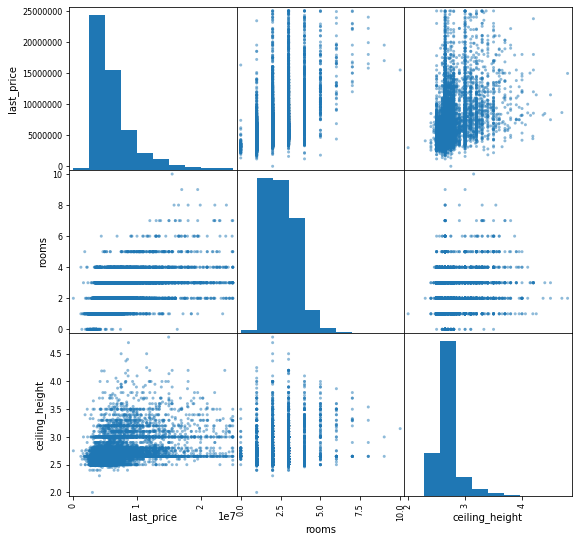

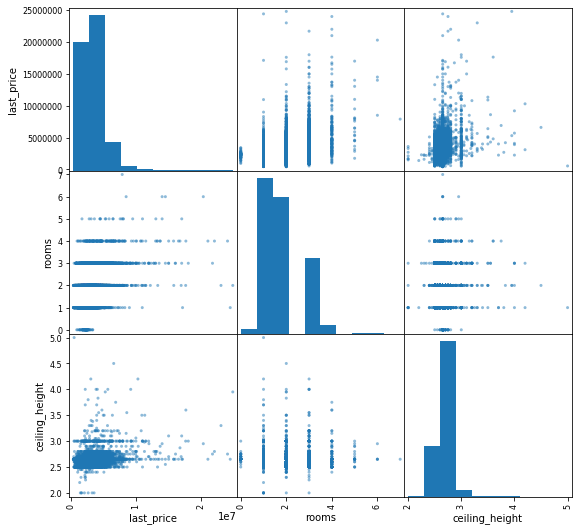

In [29]:
pd.plotting.scatter_matrix(spb_flats[['last_price','rooms','ceiling_height']] , figsize = (9,9))
plt.show()

pd.plotting.scatter_matrix(not_spb[['last_price','rooms', 'ceiling_height']] , figsize = (9,9))
plt.show()

В Питере цена на квартиру сильно зависит, от площади за квадрат, числа комнат и удаленности от центра, что похоже на большую выборку данных и не противоречит здравому смыслу. 
В Петербурге значительно больше квартир с высокими потолками и большим количеством комнат. 

### Шаг 5. Общий вывод

Если вдруг вам очень захочется переехать в Питер, то в центре в хорошей квартире жить будет лучше, но заплатить за нее придется значительно дороже. Зато вы скорее всего получите высокие потолки и, если повезет, прекрасный вид из окна. В Питере значительно больше продается и покупается больших квартир, вторичный рынок недвижимости сильно разбавлен старым жилым фондом, в пригородах все попроще -  в основном небольшие стандартизированные квартиры. 
Большинство сделок проходят в течение двух месяцев, что весьма неплохо, на мой взгляд, квартира в питере - довольно ликвидный актив. 
Дешевле всего можно купить квартиру в Выборге - замечательный город, жаль, что его так недооценивают. 

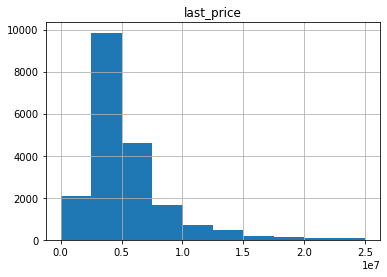

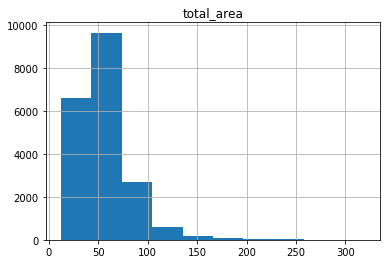

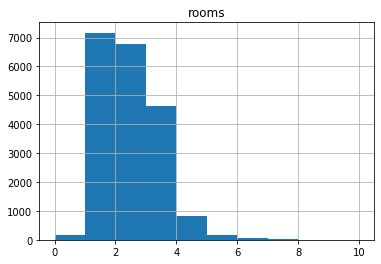

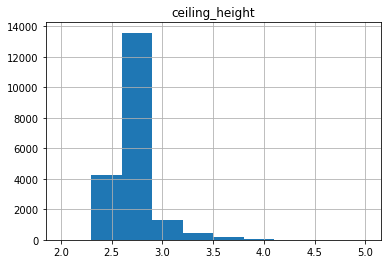

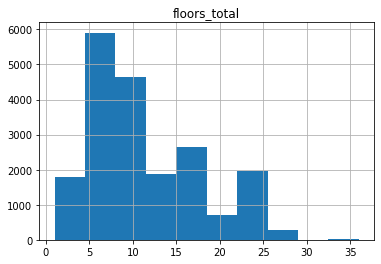

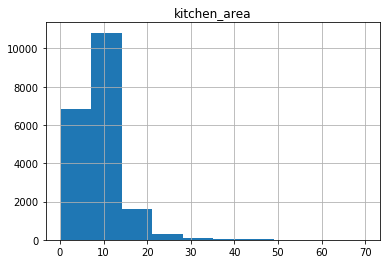

In [30]:
def hist_to_show (x):
    columns = ['last_price','total_area', 'rooms', 'ceiling_height', 'floors_total',
           'kitchen_area']
    for i in columns:
        x.hist(column=i)
        plt.show()
hist_to_show(data)